In [32]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
"""
Parametros de la DBB2
𝜆: densidad lineal de carga
𝑥: distancia de punto P al conductor
𝜀0: permitividad eléctrica del vacío
Formula -> 𝐸 =  𝜆/(2𝜋*Esub0*x)
"""
#MODELO TEORICO
PI = math.pi
permitividadElectrica = 8.85e-12
densidadLinealCarga = 30.0e-9
def calcular_E_Teorico(x):
  return (densidadLinealCarga/(2*PI*permitividadElectrica*x))
#MODELO CON METODO NUMERICO
#Me demore;) por culpa de esto
"""
A partir del metodo de integracion propuesto, se usa el metodo del trapecio
E = sumatoria de i= 0 hasta un ymax(2*k*𝜆*Δy/(yi^2 + x^2)^(3/2)
k: constante de Coulomb
𝜆: densidad lineal de carga
Δy:incremento en el valor de y
x: distancia de punto P al conductor
ymax: y maximo de la funcion
yi:valor de y en el i-ésimo paso o término de una sumatoria
yi -> yi-1  + Δy , excepto cuando y0 en ese caso y0 = 0
"""
constanteCoulomb = 9e9
def cantidad_decimales(valor):
    str_valor = f"{valor:.15f}".rstrip('0')
    if '.' in str_valor:
        decimales = len(str_valor.split('.')[1])
    else:
        decimales = 0
    return decimales

def calcular_E_MetodoNumerico(x,yMax,incrementoY):
  indice = 0.0
  E_MetNumerico = 0.0
  decimales = cantidad_decimales(incrementoY)
  yi = 0.0
  while indice <= yMax:
      if indice == 0.0:
        E_Temp = (2*constanteCoulomb* densidadLinealCarga*x* incrementoY)/(((yi)**2 + x**2)**(3/2))
        E_MetNumerico += E_Temp
      else:
        yi = yi + incrementoY
        E_Temp = (2*constanteCoulomb* densidadLinealCarga*x* incrementoY)/(((yi)**2 + x**2)**(3/2))
        E_MetNumerico += E_Temp
      indice +=incrementoY
      indice = round(indice,decimales)
  return E_MetNumerico

x = [i for i in range(2,81)]
E_Teorico = [calcular_E_Teorico(num) for num in x]
E_MetodoNumerico = [calcular_E_MetodoNumerico(x=num, yMax=100, incrementoY=0.001) for num in x]
#FUNCION PARA QUE LOS VALORES EN LOS EJES TENGAN SUS RESPECTIVAS CIFRAS SIGNIFICATIVAS
def formato_tres_cifras(val, pos):
    if val == 0:
        return "0,00"
    cifras_enteras = len(str(int(val)))
    if cifras_enteras >= 3:
        texto = f"{val:.0f}"
    else:
        decimales = 3 - cifras_enteras
        texto = f"{val:.{decimales}f}"
    texto = texto.replace(".", ",")
    return texto
#EJE X -> VALORES DEL 2 AL 80
ticks = list(range(10, 81, 10))
ticks.append(2)

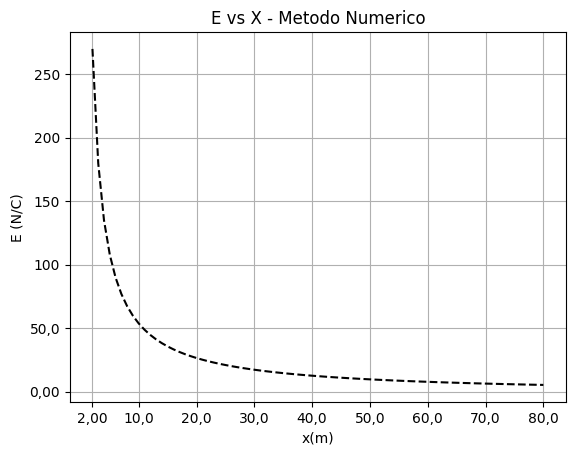

In [33]:
#GRAFICO E vs X MEDIANTE EL METODO NUMERICO
plt.plot(x,E_MetodoNumerico,color="black", linestyle = "--")
plt.xticks(ticks)
plt.gca().xaxis.set_major_formatter(formato_tres_cifras)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras)
plt.title("E vs X - Metodo Numerico")
plt.xlabel("x(m)")
plt.ylabel("E (N/C)")
plt.grid()

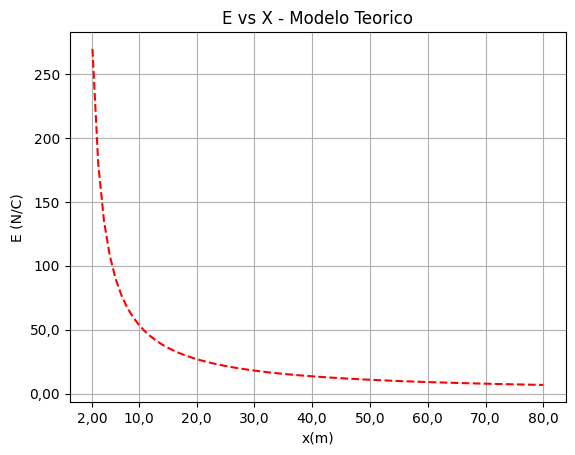

In [34]:
#GRAFICO E vs X MEDIANTE EL MODELO TEORICO
plt.plot(x,E_Teorico,color="red", linestyle = "--")
plt.xticks(ticks)
plt.gca().xaxis.set_major_formatter(formato_tres_cifras)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras)
plt.title("E vs X - Modelo Teorico")
plt.xlabel("x(m)")
plt.ylabel("E (N/C)")
plt.grid()

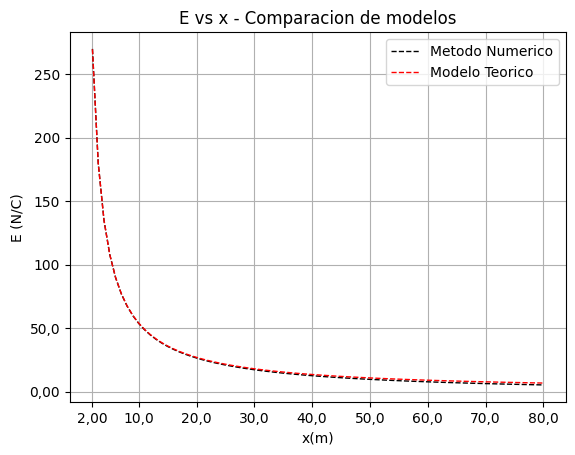

In [35]:
#GRAFICO E vs X MEDIANTE EL CALCULO NUMERICO Y EL MODELO TEORICO
plt.plot(x,E_MetodoNumerico,color="black", linestyle = "--",linewidth = 1, label = "Metodo Numerico")
plt.plot(x,E_Teorico,color="red", linestyle = "--",linewidth = 1, label = "Modelo Teorico")
plt.legend()
plt.xticks(ticks)
plt.gca().xaxis.set_major_formatter(formato_tres_cifras)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras)
plt.title("E vs x - Comparacion de modelos")
plt.xlabel("x(m)")
plt.ylabel("E (N/C)")
plt.grid()


In [36]:
def formato_tres_cifras(val, pos):
    if val == 0:
        return "0,00"
    cifras_enteras = len(str(int(val)))
    if cifras_enteras >= 3:
        texto = f"{val:.0f}"
    else:
        decimales = 3 - cifras_enteras
        texto = f"{val:.{decimales}f}"
    texto = texto.replace(".", ",")
    return texto

val = 0.4
cifras_enteras = len(str(int(val)))
print(int(cifras_enteras))
if cifras_enteras >= 3:
      texto = f"{val:.0f}"
else:
      decimales = 3 - cifras_enteras
      texto = f"{val:.{decimales}f}"
texto = texto.replace(".", ",")
print(texto)

1
0,40


In [37]:
def formato_tres_cifras(val, pos):
    if val == 0:
        return "0,00"
    cifras_enteras = len(str(int(val)))
    if cifras_enteras >= 3:
        texto = f"{val:.0f}"
    else:
        decimales = 3 - cifras_enteras
        texto = f"{val:.{decimales}f}"
    texto = texto.replace(".", ",")
    return texto

#print(formato_tres_cifras(0.2,3))
val1 = 0.2
val2 = 3
val3 = 0.23
val4 = 0.244
val5 = 1.2
val6 = 1.23
val7 = 0.234399
lista1 = [val1,val2,val3,val4,val5,val6,val7]
#caso x >= 0
val11 = -0.2
val22 = -3
val33 = -0.23
val44 = -0.244
val55 = -1.2
val66 = -1.23
val77 = -0.234399
lista2 = [val11,val22,val33,val44,val55,val66,val77]
#caso x <0

def formato_tres_cifras_significativas(valor,pos):
  texto = str(valor)
  texto = texto.split(".")
  print(texto)
  if texto[0] == '0' and len(texto) == 1:
    return "0,00"
  if(texto[0].find('-') == 0):
    texto[0] = texto[0].replace("-","")
    if(texto[0] == '0'):
      word = f"{valor:.3f}"
      word.replace(".",",")
      return word
    else:
      parteZ = len(texto[0])
      if(parteZ == 1):
        word = f"{valor:.2f}"
        word.replace(".",",")
        return word
  else:
    if(texto[0] == '0'):
      word = f"{valor:.3f}"
      word.replace(".",",")
      return word
    else:
      parteZ = len(texto[0])
      if(parteZ == 1):
        word = f"{valor:.2f}"
        word = word.replace(".",",")
        return word

print(formato_tres_cifras_significativas(0.2,1))

['0', '2']
0.200


In [38]:
# CÁLCULO DEL ERROR PORCENTUAL REFERENCIAL
# Error % = |Valor Experimental - Valor Teórico| / |Valor Teórico| × 100

# Calcular errores porcentuales para todos los puntos
errores_todos_puntos = []
for i in range(len(x)):
    e_teorico = E_Teorico[i]
    e_numerico = E_MetodoNumerico[i]
    error_pct = abs(e_numerico - e_teorico) / abs(e_teorico) * 100
    errores_todos_puntos.append(error_pct)

# Seleccionar algunos puntos específicos para análisis detallado
puntos_analisis = [0, 4, 9, 19, 39, 59, 78]  # Índices correspondientes a x = 2, 6, 11, 21, 41, 61, 80
errores_porcentuales = []

print("ANÁLISIS DE ERROR PORCENTUAL REFERENCIAL")
print("=" * 50)
print(f"{'x (m)':<8} {'E_Teórico':<15} {'E_Numérico':<15} {'Error %':<10}")
print("-" * 50)

for indice in puntos_analisis:
    punto = x[indice]
    e_teorico = E_Teorico[indice]
    e_numerico = E_MetodoNumerico[indice]
    error_pct = abs(e_numerico - e_teorico) / abs(e_teorico) * 100
    errores_porcentuales.append(error_pct)
    
    print(f"{punto:<8} {e_teorico:<15.6e} {e_numerico:<15.6e} {error_pct:<10.6f}")

print("-" * 50)
print(f"Error promedio: {sum(errores_porcentuales)/len(errores_porcentuales):.6f}%")
print(f"Error máximo: {max(errores_todos_puntos):.6f}%")
print(f"Error mínimo: {min(errores_todos_puntos):.6f}%")

ANÁLISIS DE ERROR PORCENTUAL REFERENCIAL
x (m)    E_Teórico       E_Numérico      Error %   
--------------------------------------------------
2        2.697541e+02    2.700135e+02    0.096153  
6        8.991805e+01    8.984594e+01    0.080194  
11       4.904621e+01    4.879881e+01    0.504413  
21       2.569087e+01    2.516599e+01    2.043050  
41       1.315874e+01    1.218641e+01    7.389193  
61       8.844398e+00    7.557459e+00    14.550895 
80       6.743854e+00    5.270917e+00    21.841171 
--------------------------------------------------
Error promedio: 6.643581%
Error máximo: 21.841171%
Error mínimo: 0.023677%


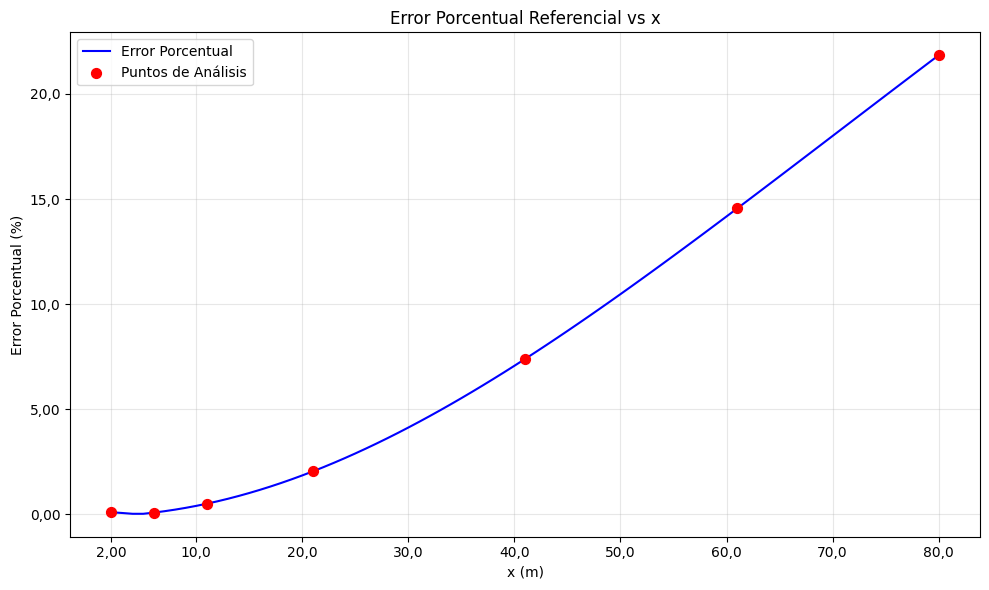


ESTADÍSTICAS DEL ERROR PORCENTUAL:
Desviación estándar: 6.863083%
Rango de error: 21.817494%


In [39]:
# GRÁFICO DEL ERROR PORCENTUAL vs X
plt.figure(figsize=(10, 6))
plt.plot(x, errores_todos_puntos, color="blue", linestyle="-", linewidth=1.5, label="Error Porcentual")
plt.scatter([x[i] for i in puntos_analisis], [errores_todos_puntos[i] for i in puntos_analisis], 
           color="red", s=50, zorder=5, label="Puntos de Análisis")

plt.xticks(ticks)
plt.gca().xaxis.set_major_formatter(formato_tres_cifras)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras)
plt.title("Error Porcentual Referencial vs x")
plt.xlabel("x (m)")
plt.ylabel("Error Porcentual (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Estadísticas adicionales del error
print(f"\nESTADÍSTICAS DEL ERROR PORCENTUAL:")
print(f"Desviación estándar: {(sum([(e - sum(errores_todos_puntos)/len(errores_todos_puntos))**2 for e in errores_todos_puntos])/len(errores_todos_puntos))**0.5:.6f}%")
print(f"Rango de error: {max(errores_todos_puntos) - min(errores_todos_puntos):.6f}%")